# Comparison between training with and without Adam optimizer 

## Import libreries and define global variables

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file, cross_validation
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [79]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [80]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [81]:
test_frac = 1/4

In [82]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [83]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [84]:
preprocessing = 0

In [85]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [86]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'sigm',
        'eta': 0.05,
        'lam': 0.0,
        'alpha': 0.6,
        'n_batch': 1,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### No optimizer

Build model

In [87]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_weights_list()

Training without Adam optimizer:

In [88]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 6.918e-01, val_loss: 7.321e-01; train_accuracy: 5.152e+01, val_accuracy: 4.436e+01  train_MSE: 2.492e-01, val_MSE: 2.687e-01  lr : 0.05
Epoch 1: train_loss: 6.837e-01, val_loss: 7.198e-01; train_accuracy: 5.253e+01, val_accuracy: 4.521e+01  train_MSE: 2.454e-01, val_MSE: 2.630e-01  lr : 0.05
Epoch 2: train_loss: 6.752e-01, val_loss: 7.181e-01; train_accuracy: 5.455e+01, val_accuracy: 5.010e+01  train_MSE: 2.409e-01, val_MSE: 2.617e-01  lr : 0.05
Epoch 3: train_loss: 6.687e-01, val_loss: 7.093e-01; train_accuracy: 5.758e+01, val_accuracy: 4.784e+01  train_MSE: 2.380e-01, val_MSE: 2.580e-01  lr : 0.05
Epoch 4: train_loss: 6.437e-01, val_loss: 7.044e-01; train_accuracy: 6.768e+01, val_accuracy: 5.168e+01  train_MSE: 2.258e-01, val_MSE: 2.554e-01  lr : 0.05


Epoch 5: train_loss: 5.896e-01, val_loss: 6.747e-01; train_accuracy: 6.869e+01, val_accuracy: 5.907e+01  train_MSE: 2.004e-01, val_MSE: 2.410e-01  lr : 0.05
Epoch 6: train_loss: 5.546e-01, val_loss: 6.418e-01; train_accuracy: 7.475e+01, val_accuracy: 6.570e+01  train_MSE: 1.839e-01, val_MSE: 2.251e-01  lr : 0.05
Epoch 7: train_loss: 4.962e-01, val_loss: 6.198e-01; train_accuracy: 8.081e+01, val_accuracy: 6.768e+01  train_MSE: 1.599e-01, val_MSE: 2.143e-01  lr : 0.05
Epoch 8: train_loss: 4.737e-01, val_loss: 5.841e-01; train_accuracy: 8.182e+01, val_accuracy: 7.572e+01  train_MSE: 1.496e-01, val_MSE: 1.945e-01  lr : 0.05
Epoch 9: train_loss: 4.529e-01, val_loss: 5.510e-01; train_accuracy: 8.384e+01, val_accuracy: 7.867e+01  train_MSE: 1.431e-01, val_MSE: 1.810e-01  lr : 0.05
Epoch 10: train_loss: 4.360e-01, val_loss: 5.318e-01; train_accuracy: 8.586e+01, val_accuracy: 7.960e+01  train_MSE: 1.376e-01, val_MSE: 1.721e-01  lr : 0.05
Epoch 11: train_loss: 4.270e-01, val_loss: 5.326e-01; tra

KeyboardInterrupt: 

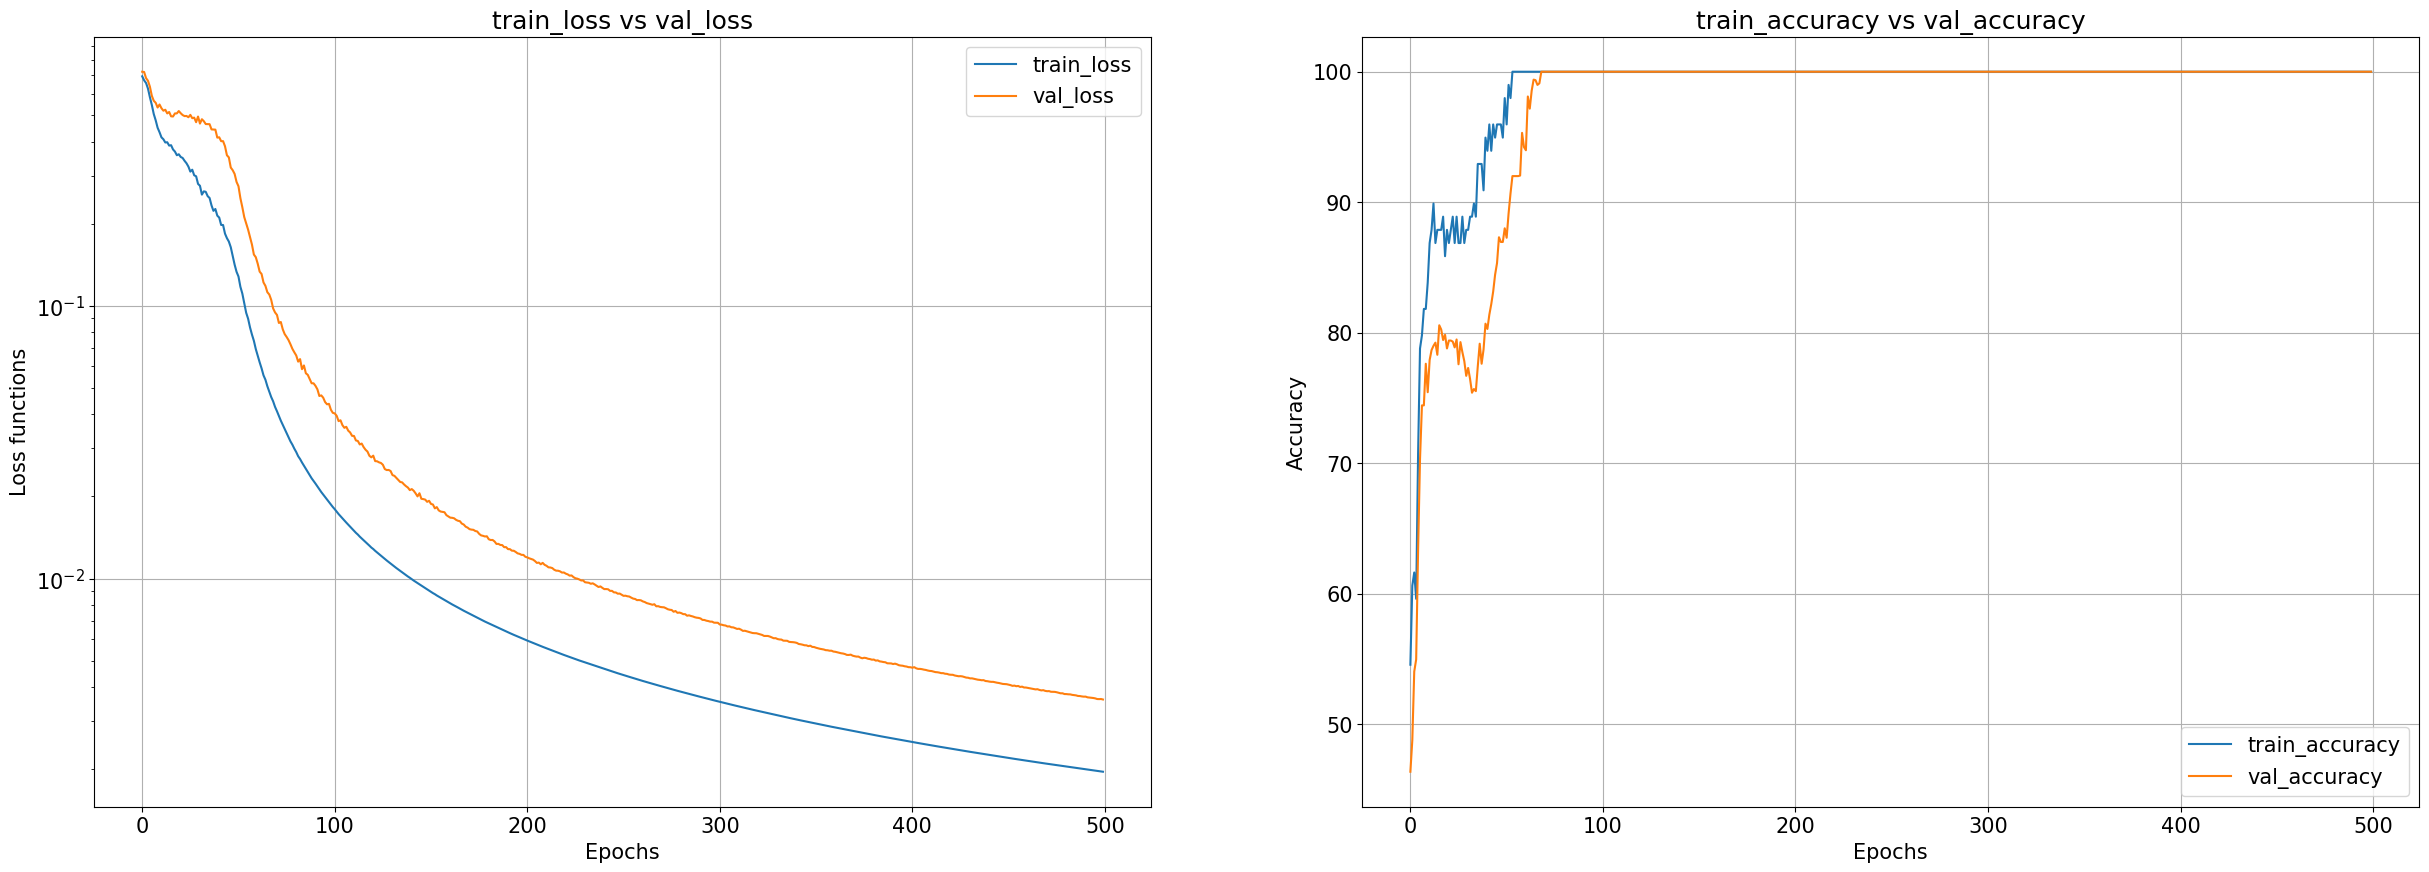

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'],label='train_accuracy')
plt.plot(history_noopt['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [ ]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_weights_list()

Training with Adam optimizer:


In [ ]:
np.random.seed(seed)
params['use_opt'] = 1
history_opt = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.474e-01, val_loss: 6.795e-01; train_accuracy: 6.263e+01, val_accuracy: 5.495e+01  train_MSE: 2.278e-01, val_MSE: 2.432e-01  lr : 0.05
Epoch 1: train_loss: 4.583e-01, val_loss: 5.944e-01; train_accuracy: 7.778e+01, val_accuracy: 6.622e+01  train_MSE: 1.504e-01, val_MSE: 2.077e-01  lr : 0.05
Epoch 2: train_loss: 4.524e-01, val_loss: 4.759e-01; train_accuracy: 7.778e+01, val_accuracy: 8.040e+01  train_MSE: 1.507e-01, val_MSE: 1.566e-01  lr : 0.05
Epoch 3: train_loss: 3.786e-01, val_loss: 4.459e-01; train_accuracy: 8.586e+01, val_accuracy: 8.347e+01  train_MSE: 1.177e-01, val_MSE: 1.422e-01  lr : 0.05
Epoch 4: train_loss: 3.032e-01, val_loss: 4.329e-01; train_accuracy: 9.091e+01, val_accuracy: 8.360e+01  train_MSE: 8.687e-02, val_MSE: 1.356e-01  lr : 0.05
Epoch 5: train_loss: 2.700e-01, val_loss: 4.215e-01; train_accuracy: 9.293e+01, val_accuracy: 8.570e+01  train_MSE: 7.527e-02, val_MSE: 1.277e-01  lr : 0.05
Epoch 6: train_loss: 2.366e-01, val_loss: 3.963e-01; train

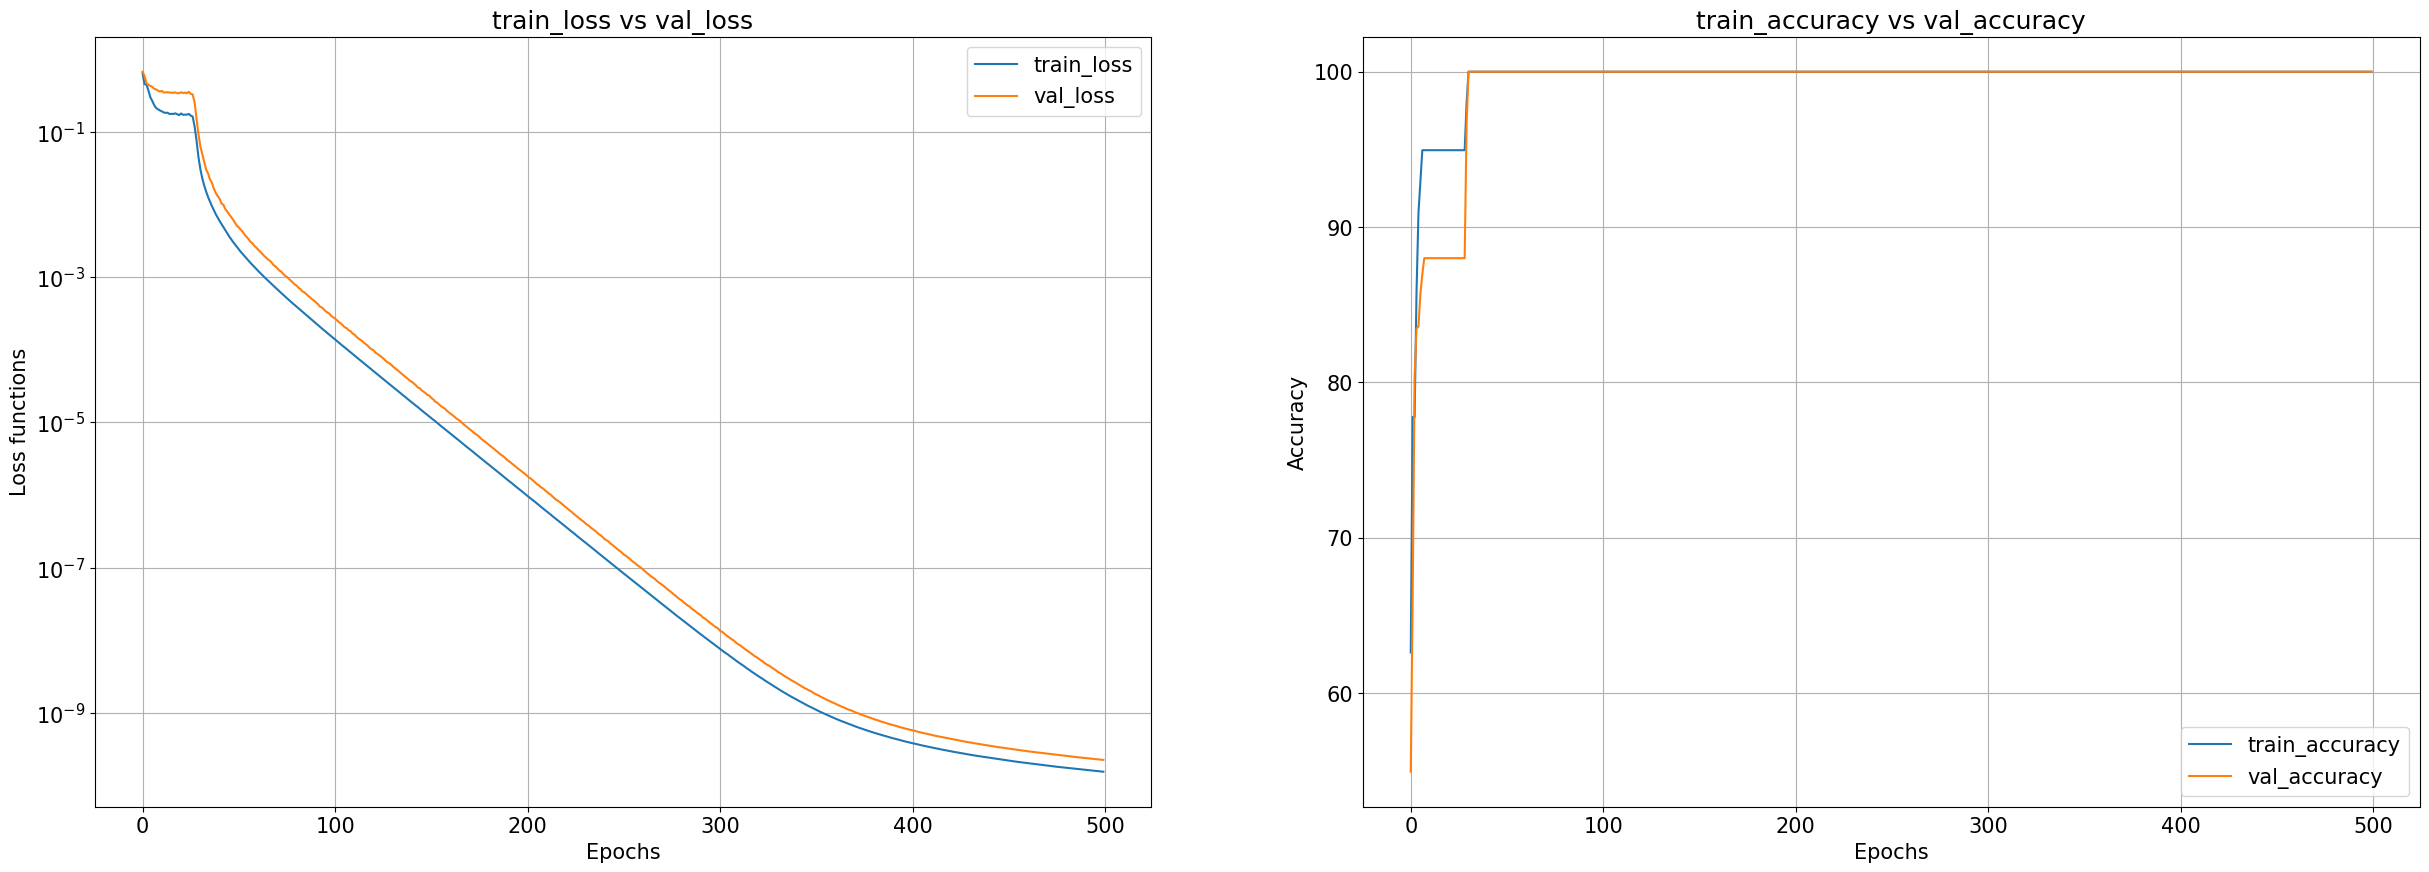

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_accuracy'],label='train_accuracy')
plt.plot(history_opt['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

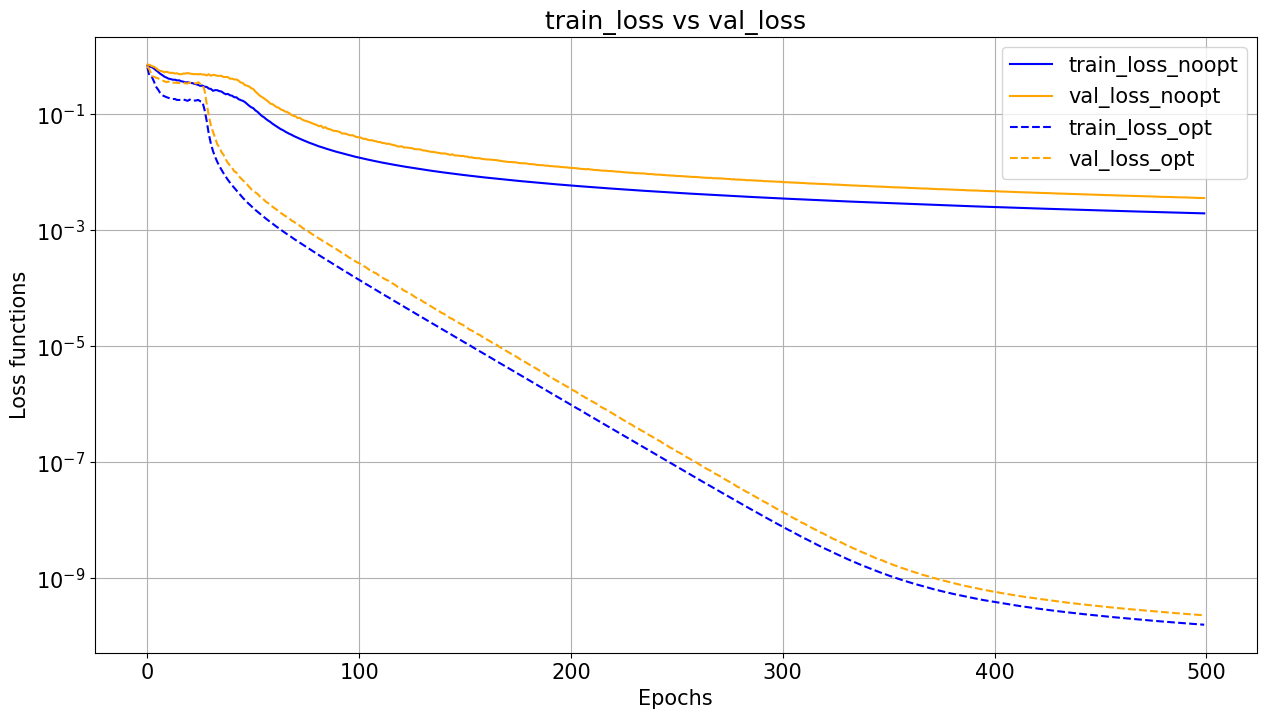

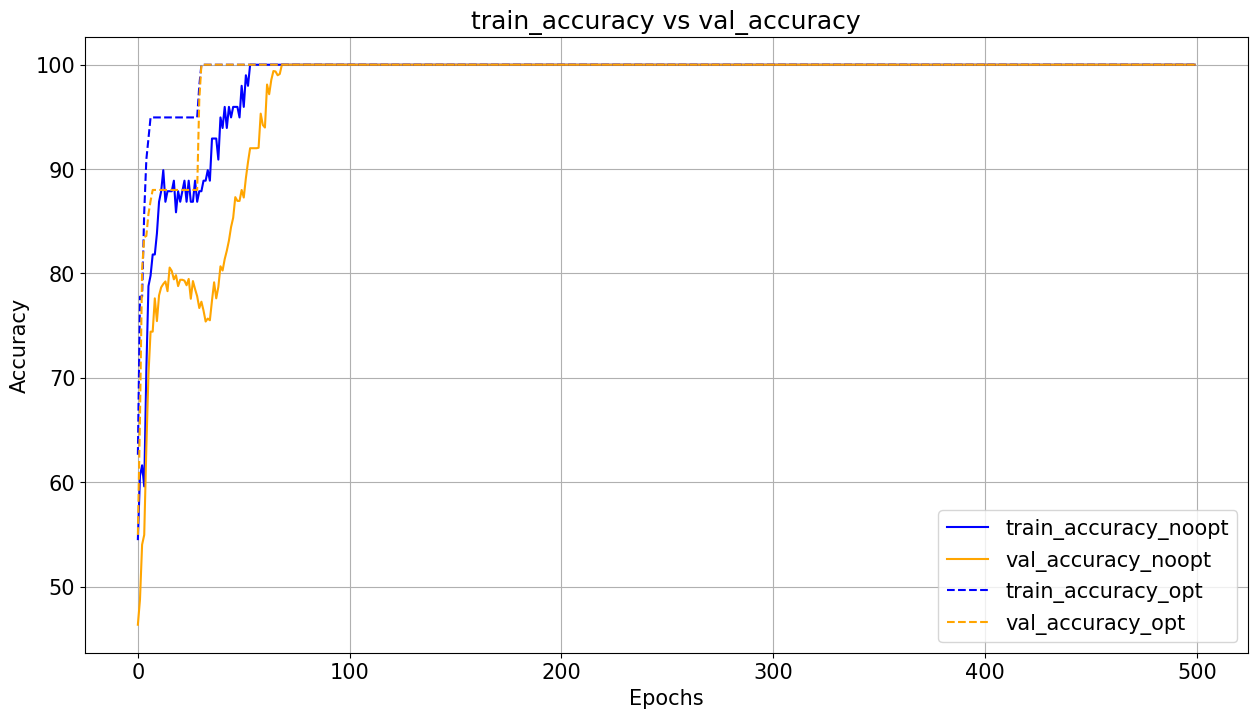

In [ ]:
plt.figure(1,figsize=(15,8))

plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['val_loss'], '-', label='val_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['val_loss'], '--', label='val_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
plt.plot(history_noopt['train_accuracy'], '-',label='train_accuracy_noopt', color='blue')
plt.plot(history_noopt['val_accuracy'], '-', label='val_accuracy_noopt', color='orange')
plt.plot(history_opt['train_accuracy'], '--', label='train_accuracy_opt', color='blue')
plt.plot(history_opt['val_accuracy'], '--', label='val_accuracy_opt', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [ ]:
params = orig_params.copy()
params['loss'] = 'binary_crossentropy'
params['output_act_func'] = 'sigm'
params['scale_eta_batchsize'] = None
params['dim_hidden'] = params.pop('hidden_dim')
#params['n_batch'] = 'batch'
print(params)
seed = np.random.randint(10,1000)
np.random.seed(seed)
params['use_opt'] = 0
history_cv_noopt = cross_validation(X_train_monk, y_train_monk.reshape(1,X_train_monk.shape[1]), folds=5, metrics=[MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})
np.random.seed(seed)
params['use_opt'] = 1
history_cv_opt = cross_validation(X_train_monk, y_train_monk.reshape(1,X_train_monk.shape[1]), 5, [MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})

{'hidden_act_func': 'sigm', 'eta': 0.05, 'lam': 0.0, 'alpha': 0.6, 'n_batch': 1, 'use_opt': 0, 'nest': False, 'l1_reg': False, 'epochs': 500, 'loss': 'binary_crossentropy', 'output_act_func': 'sigm', 'scale_eta_batchsize': None, 'dim_hidden': 4}


In [ ]:
history_cv_noopt

{'train_loss_mean': 0.002712280562333771,
 'train_loss_std': 0.0005494408783120594,
 'val_loss_mean': 0.08323176761122289,
 'val_loss_std': 0.1089882058307752,
 'train_MSE_mean': 2.1470544816745662e-05,
 'train_MSE_std': 1.3519424957250023e-05,
 'val_MSE_mean': 0.017986194943883795,
 'val_MSE_std': 0.022384759990934974,
 'train_accuracy_mean': 100.0,
 'train_accuracy_std': 0.0,
 'val_accuracy_mean': 97.53333333333333,
 'val_accuracy_std': 3.317294747899941}

In [ ]:
history_cv_opt

{'train_loss_mean': 1.912861679417294e-10,
 'train_loss_std': 6.786940427859588e-11,
 'val_loss_mean': 1.2408861579484405e-08,
 'val_loss_std': 2.365278195365774e-08,
 'train_MSE_mean': 1.4213881512891195e-19,
 'train_MSE_std': 1.390850615067816e-19,
 'val_MSE_mean': 1.57382315207138e-14,
 'val_MSE_std': 3.1462140341070145e-14,
 'train_accuracy_mean': 100.0,
 'train_accuracy_std': 0.0,
 'val_accuracy_mean': 100.0,
 'val_accuracy_std': 0.0}

## CUP

Define training and model hyperparameters

In [96]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.005,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

seed = np.random.randint(10,1000)

### No optimizer

Build model

In [97]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_weights_list()

Training without Adam optimizer:

In [98]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 3.545e+02, val_loss: 3.694e+02; train_MEE: 2.757e+01, val_MEE: 2.813e+01  lr : 0.005
Epoch 1: train_loss: 5.811e+01, val_loss: 6.659e+01; train_MEE: 1.178e+01, val_MEE: 1.276e+01  lr : 0.005
Epoch 2: train_loss: 3.740e+01, val_loss: 4.620e+01; train_MEE: 9.625e+00, val_MEE: 1.076e+01  lr : 0.005
Epoch 3: train_loss: 2.714e+01, val_loss: 3.214e+01; train_MEE: 7.947e+00, val_MEE: 8.577e+00  lr : 0.005
Epoch 4: train_loss: 1.868e+01, val_loss: 2.350e+01; train_MEE: 6.581e+00, val_MEE: 7.322e+00  lr : 0.005
Epoch 5: train_loss: 1.322e+01, val_loss: 1.736e+01; train_MEE: 5.569e+00, val_MEE: 6.424e+00  lr : 0.005
Epoch 6: train_loss: 9.623e+00, val_loss: 1.344e+01; train_MEE: 4.717e+00, val_MEE: 5.589e+00  lr : 0.005
Epoch 7: train_loss: 7.547e+00, val_loss: 1.047e+01; train_MEE: 4.167e+00, val_MEE: 4.898e+00  lr : 0.005
Epoch 8: train_loss: 6.347e+00, val_loss: 8.878e+00; train_MEE: 3.786e+00, val_MEE: 4.476e+00  lr : 0.005
Epoch 9: train_loss: 5.482e+00, val_loss: 7.85

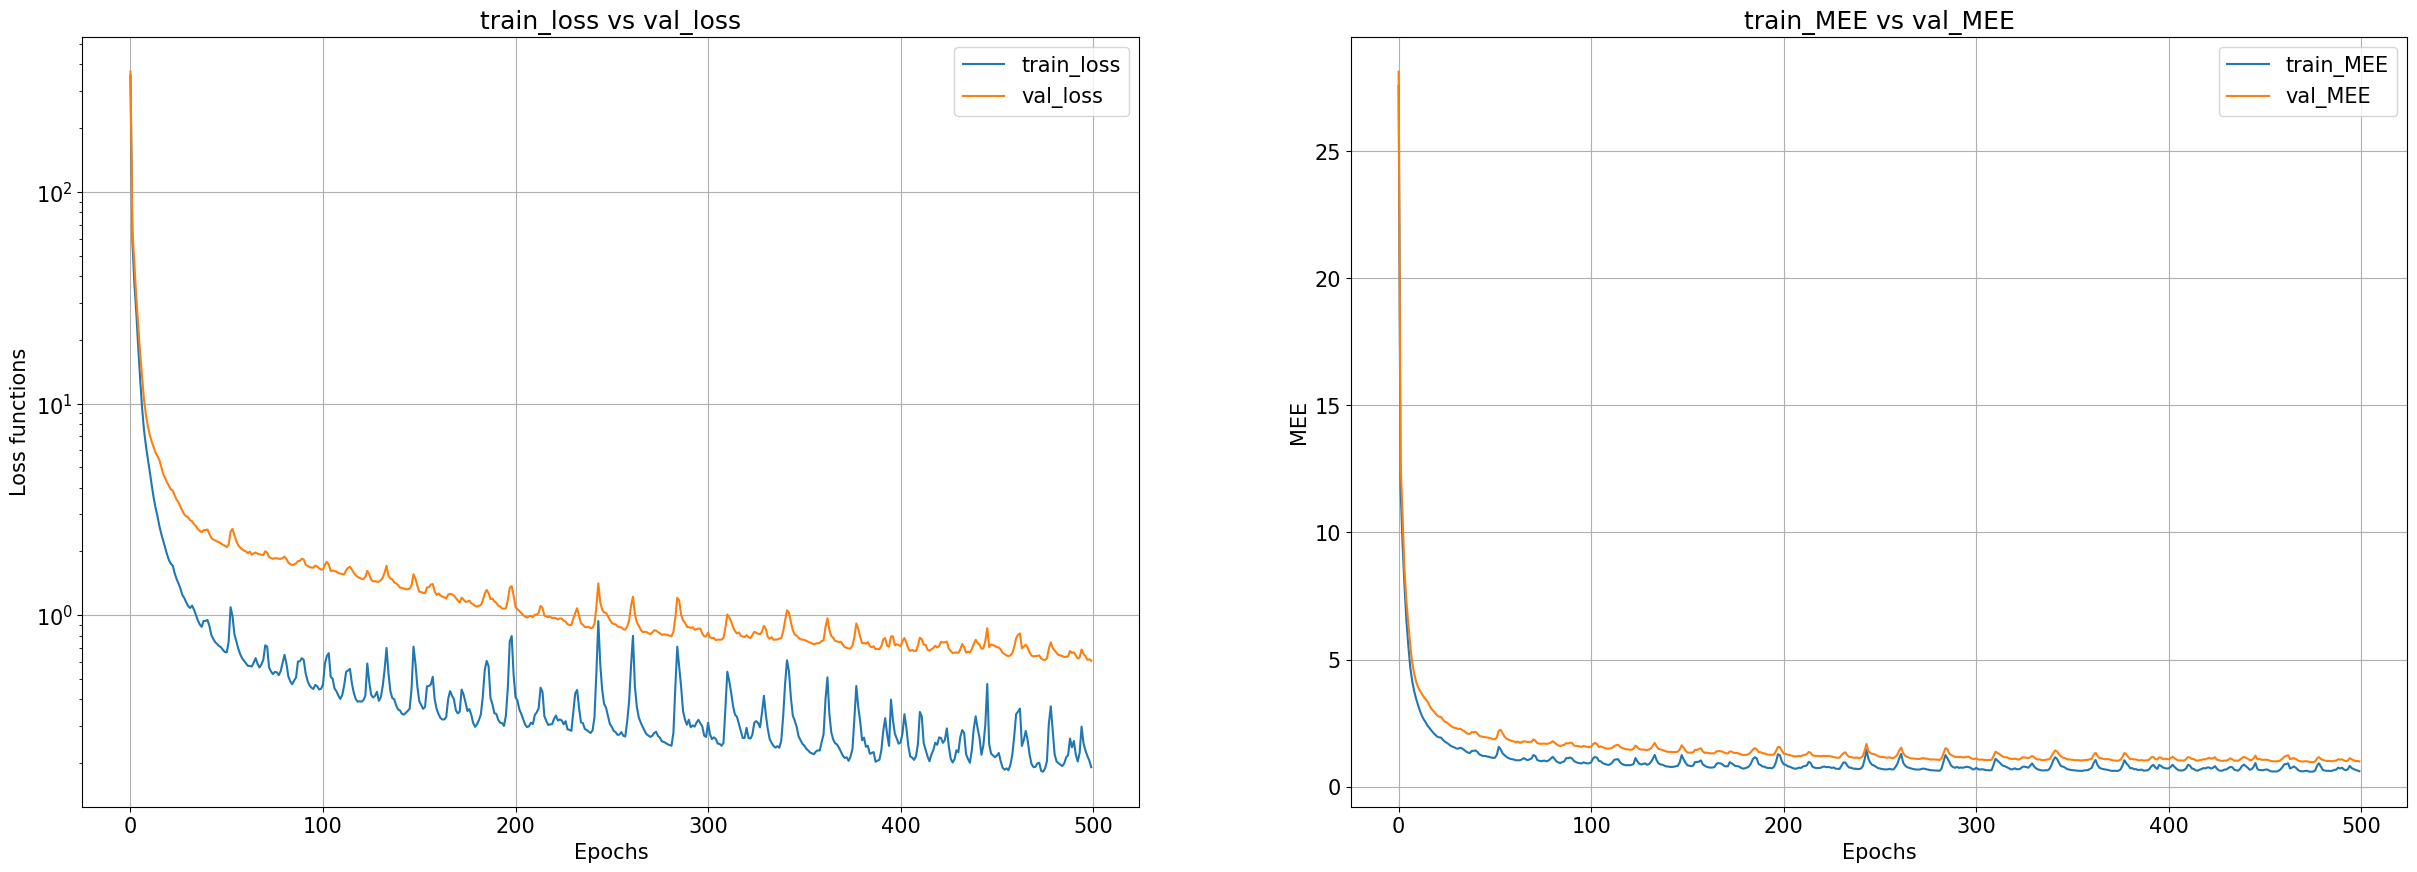

In [99]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'],label='train_MEE')
plt.plot(history_noopt['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [100]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with Adam optimizer:


In [101]:
np.random.seed(seed)
params['use_opt'] = 1
params['eta'] = 0.005
history_opt = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 7.055e+02, val_loss: 7.366e+02; train_MEE: 4.097e+01, val_MEE: 4.159e+01  lr : 0.005
Epoch 1: train_loss: 6.270e+02, val_loss: 6.581e+02; train_MEE: 3.817e+01, val_MEE: 3.891e+01  lr : 0.005
Epoch 2: train_loss: 5.668e+02, val_loss: 5.974e+02; train_MEE: 3.592e+01, val_MEE: 3.676e+01  lr : 0.005
Epoch 3: train_loss: 5.197e+02, val_loss: 5.503e+02; train_MEE: 3.413e+01, val_MEE: 3.506e+01  lr : 0.005
Epoch 4: train_loss: 4.819e+02, val_loss: 5.116e+02; train_MEE: 3.267e+01, val_MEE: 3.361e+01  lr : 0.005
Epoch 5: train_loss: 4.509e+02, val_loss: 4.786e+02; train_MEE: 3.138e+01, val_MEE: 3.231e+01  lr : 0.005
Epoch 6: train_loss: 4.242e+02, val_loss: 4.503e+02; train_MEE: 3.024e+01, val_MEE: 3.114e+01  lr : 0.005
Epoch 7: train_loss: 4.006e+02, val_loss: 4.259e+02; train_MEE: 2.922e+01, val_MEE: 3.012e+01  lr : 0.005
Epoch 8: train_loss: 3.810e+02, val_loss: 4.043e+02; train_MEE: 2.836e+01, val_MEE: 2.922e+01  lr : 0.005
Epoch 9: train_loss: 3.627e+02, val_loss: 3.84

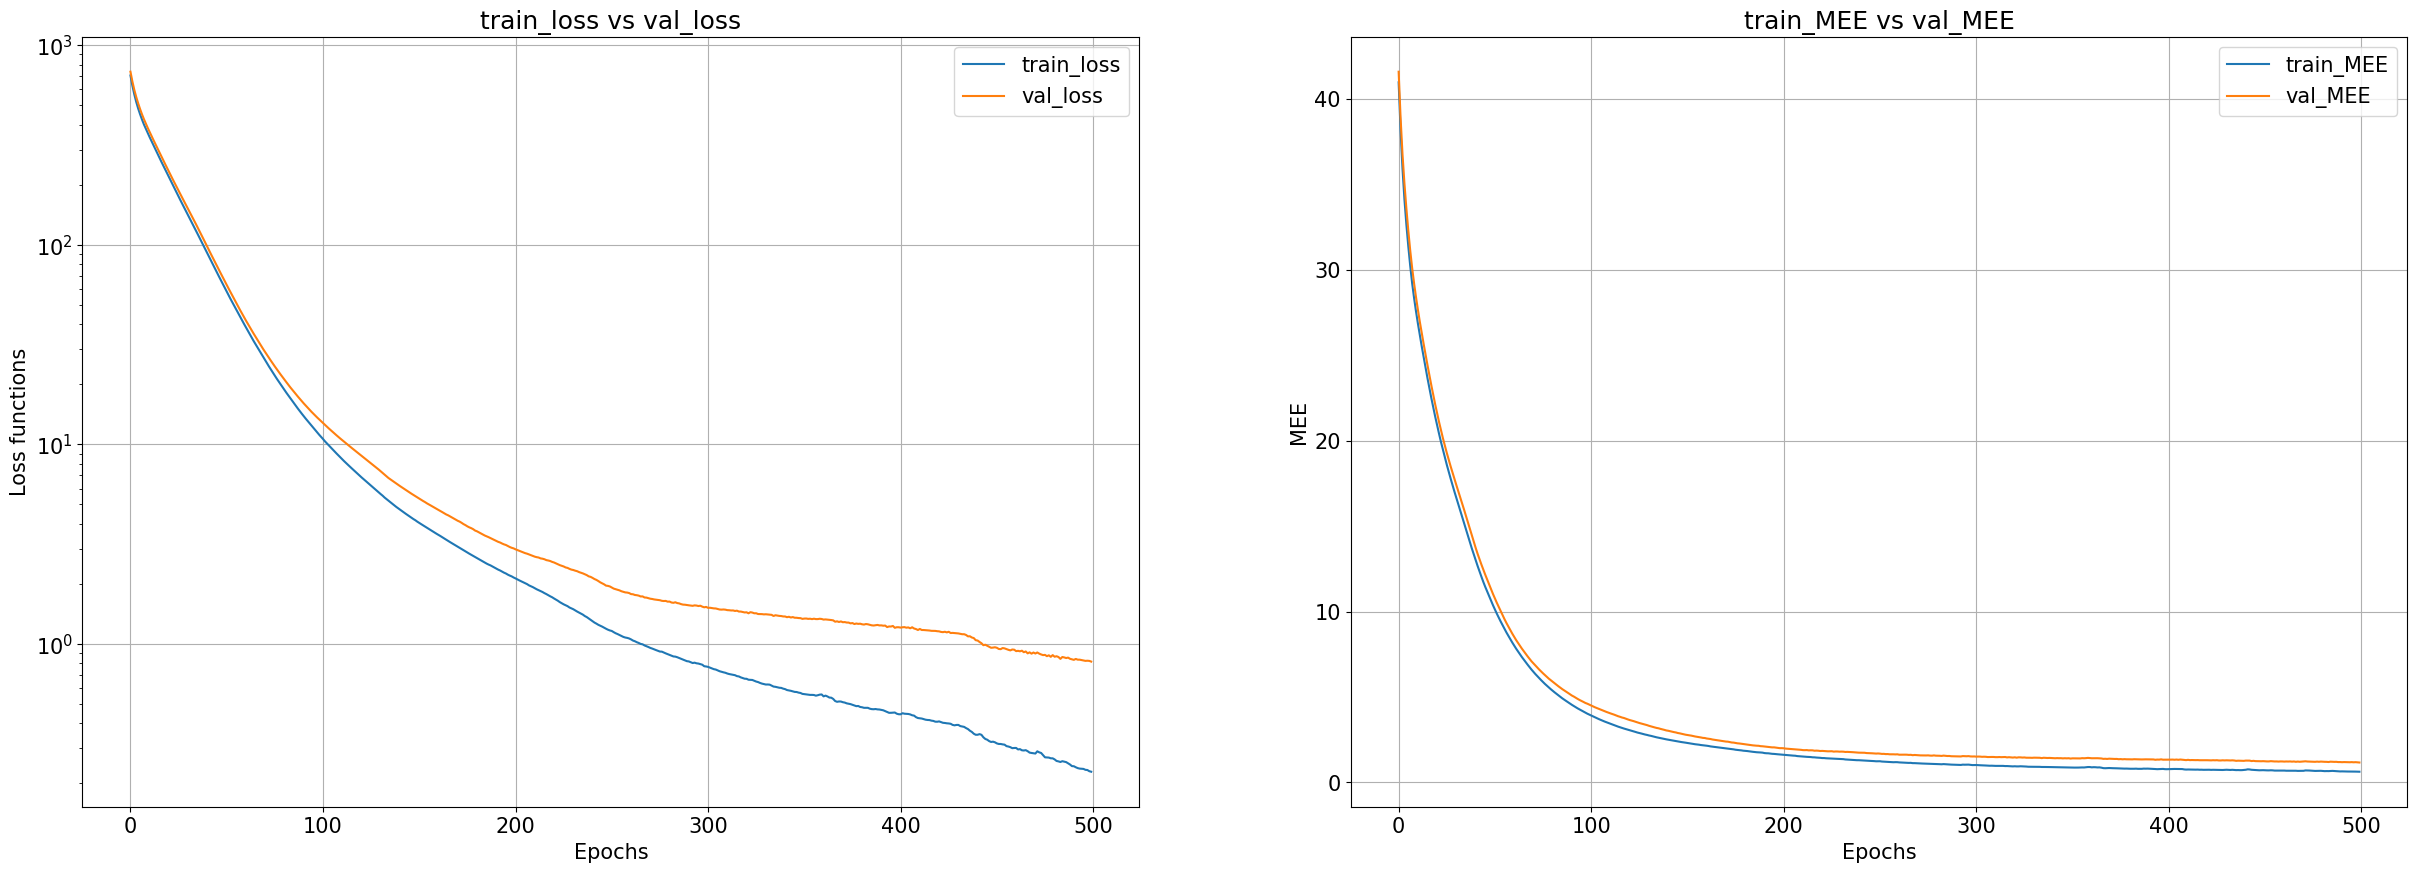

In [102]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_MEE'],label='train_MEE')
plt.plot(history_opt['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

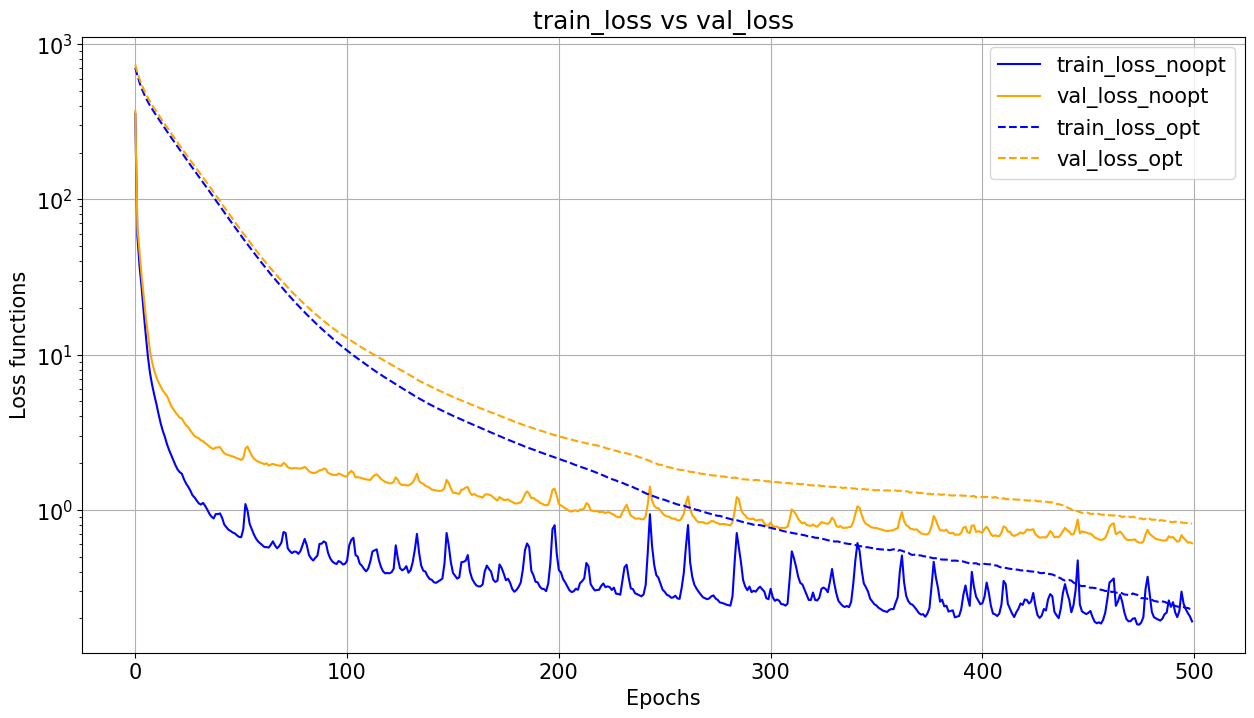

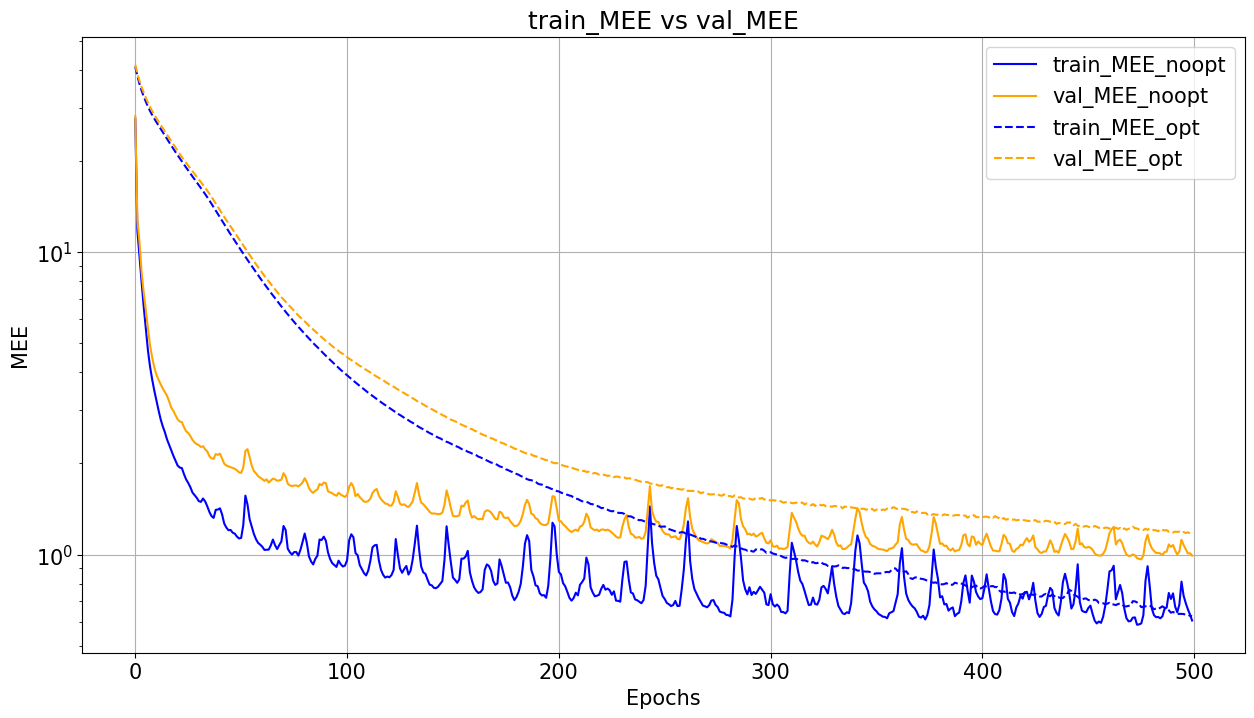

In [103]:
plt.figure(1,figsize=(15,8))

plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['val_loss'], '-', label='val_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['val_loss'], '--', label='val_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
plt.plot(history_noopt['train_MEE'], '-',label='train_MEE_noopt', color='blue')
plt.plot(history_noopt['val_MEE'], '-', label='val_MEE_noopt', color='orange')
plt.plot(history_opt['train_MEE'], '--', label='train_MEE_opt', color='blue')
plt.plot(history_opt['val_MEE'], '--', label='val_MEE_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [92]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.001,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

In [93]:
params = orig_params.copy()
params['loss'] = 'MSE'
params['output_act_func'] = 'lin'
params['scale_eta_batchsize'] = None
params['dim_hidden'] = params.pop('hidden_dim')
params['dim_hidden2'] = params.pop('hidden_dim2')
params['n_batch'] = 150
print(params)
seed = np.random.randint(10,1000)
params['use_opt'] = 0
np.random.seed(seed)
history_cv_noopt = cross_validation(X_train_cup, y_train_cup, folds=5, metrics=[MSE,MEE], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})
np.random.seed(seed)
params['use_opt'] = 1
history_cv_opt = cross_validation(X_train_cup, y_train_cup, 5, [MSE,MEE], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})


{'hidden_act_func': 'tanh', 'hidden_act_func2': 'tanh', 'eta': 0.001, 'lam': 0.0001, 'alpha': 0.9, 'n_batch': 150, 'use_opt': 0, 'nest': True, 'l1_reg': False, 'epochs': 500, 'loss': 'MSE', 'output_act_func': 'lin', 'scale_eta_batchsize': None, 'dim_hidden': 50, 'dim_hidden2': 50}


In [94]:
history_cv_noopt

{'train_loss_mean': 0.7503925664710007,
 'train_loss_std': 0.022996086060174455,
 'val_loss_mean': 1.3070282726863636,
 'val_loss_std': 0.47028727658187336,
 'train_MSE_mean': 0.7503925664710007,
 'train_MSE_std': 0.022996086060174455,
 'val_MSE_mean': 1.3070282726863636,
 'val_MSE_std': 0.47028727658187336,
 'train_MEE_mean': 1.1399152228976919,
 'train_MEE_std': 0.022486177712510724,
 'val_MEE_mean': 1.4002504189960194,
 'val_MEE_std': 0.11139058452936722}

In [95]:
history_cv_opt

{'train_loss_mean': 9.184395011571002,
 'train_loss_std': 0.4556474088314192,
 'val_loss_mean': 9.875021717249393,
 'val_loss_std': 0.7990107054142951,
 'train_MSE_mean': 9.184395011571002,
 'train_MSE_std': 0.4556474088314192,
 'val_MSE_mean': 9.875021717249393,
 'val_MSE_std': 0.7990107054142951,
 'train_MEE_mean': 3.576722936528731,
 'train_MEE_std': 0.0807292443703916,
 'val_MEE_mean': 3.7535333933326007,
 'val_MEE_std': 0.18004590905907664}